In [1]:
import numpy
import xarray
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats
import itertools
import string
import matplotlib.patches
import pandas

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

In [3]:
xlat_ncfile_name = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

In [4]:
data_dir = '/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = xarray.open_dataset(times_ncfile_name)
xlat_ncfile = xarray.open_dataset(xlat_ncfile_name)
xlong_ncfile = xarray.open_dataset(xlong_ncfile_name)
landmask_ncfile = xarray.open_dataset(landmask_ncfile_name)

FileNotFoundError: [Errno 2] No such file or directory: b'/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

In [8]:
time_var = time_ncfile['Times']
time = time_ncfile['Times'].data
xlat = xlat_ncfile['XLAT'].data[0,:,:]
xlong = xlong_ncfile['XLONG'].data[0,:,:]
landmask = landmask_ncfile['LANDMASK'].data[0,:,:]

# GEO EM FILE

In [9]:
geo_em_ncfile = xarray.open_dataset('/beegfs/DATA/pritchard/blangenb/WRF_ARCHIVE/CHEYENNE/FMAASO/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'].data[0,:,:]

In [10]:
round(HGT_M.shape[0]/2)

90

# lat indices subset

In [11]:
lat_hi = 10.
lat_lo = -10.
# subset between lat_hi and lat_lo
lat_indices = (xlat<=lat_hi)&(xlat>=lat_lo)

In [12]:
HGT_M_lat_subset = HGT_M[lat_indices[:,0],:]
HGT_M_lat_subset_maxvals = numpy.max(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_equator = HGT_M[round(HGT_M_lat_subset.shape[0]/2),:]
HGT_M_lat_subset_minvals = numpy.min(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_mean = numpy.mean(HGT_M_lat_subset, axis=0)
HGT_M_lat_subset_median = numpy.median(HGT_M_lat_subset, axis=0)

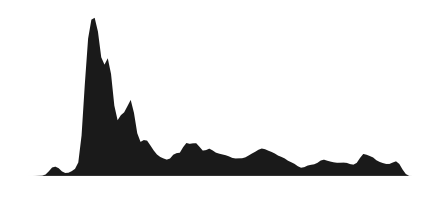

In [34]:
y_zero = numpy.zeros(xlong.shape[1])

fig,ax = mp.subplots(1,1)
fig.set_size_inches(6,3)

ax.fill_between(xlong[0,:]+360., y_zero, HGT_M_lat_subset_mean/1000., facecolor='0.1', interpolate=True,zorder=2)
ax.set_xlim(273,326)#xlong.min()+55.+360.,xlong.max()+360.)
#mp.axis('off')
ax.set_axis_off()

fig.tight_layout()
fig.savefig('andes_profile.png', bbox_inches='tight', transparent=True)